In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [4]:
df_original = pd.read_csv('data_05_06.csv', sep=';', encoding='cp1251', decimal=',')

In [ ]:
#df_original = pd.read_excel('/Users/vladleschev/Desktop/выгрузка_кодированная.xlsx')
#df_original

In [5]:
df = df_original ## Создание копии данных, чтобы в последующем был оригинал всех данных

In [6]:
df

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.05.2017 0:03,03.05.2017 0:00,4513479_TR,Доставлен,761,761,Магазины,Безналичная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,горшки,КГТ,"ТЕГА, ГОРШОК Веселая Черепаха, Польша",КГТ,Нет,NaN,1,152,152,76,5,2 017,23111,Доставлен,Москва,76,49,49,2,1,30.04.2017 0:00,55574954-50515053535277,107117_ku13@mail.ru,Марина,ID10020734553,0,NaN
1,01.05.2017 10:18,03.05.2017 0:00,4513492_TR,К отгрузке,1 878,1 878,Pick point,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),жилеты,ОДЕЖДА,"LEADER KIDS, ЖИЛЕТ Тигр, (син), р.140",МГТ,Нет,NaN,1,499,499,300,5,2 017,NaN,Доставлен,Москва,199,180,180,1,1,30.04.2017 0:00,55574851-50484949535070,121117_yu21@yandex.ru,Гость,IDL00035982755,0,NaN
2,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"LEADER KIDS, КОСЫНКА (набивка), р. 44",МГТ,Нет,NaN,1,120,120,"47,5",5,2 017,23111,Отменен,Москва,"72,5",49,49,7,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00038110048,0,NaN
3,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"ГАМЕКС, БОДИ Lapka, (гол), р. 68, Польша",МГТ,Нет,NaN,1,279,279,"151,23",5,2 017,23111,Отменен,Москва,"127,77",49,49,5,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,ID000so-4578957,0,NaN
4,01.05.2017 0:03,08.05.2017 0:00,4513499_TR,Расформирован ПВЗ,1 374,1 374,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"AGA, БОДИ (роз), р. 68, Польша",МГТ,Нет,NaN,1,279,279,"142,22",5,2 017,23111,Отменен,Москва,"136,78",49,49,4,0,30.04.2017 0:00,55575054-55515752524870,guest_103117_gu28@workmail.ru,Гость,IDL00016235553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730553,30.06.2017 23:08,04.07.2017 0:00,5031550_TR,Расформирован ПВЗ,3 723,"3 723,01",Магазины,Безналичная,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,NaN,ППКП,"НУТРИЛАК, ЗАМЕНИТЕЛЬ молока кисломолочный, с р...",МГТ,Нет,NaN,2,343,686,"326,21",6,2 017,GL0285876,Отменен,МО,"33,58",49,49,6,0,30.06.2017 0:00,55574953-50495349574974,97117_au14@bk.ru,Андрей,ID10018195452,0,NaN
730554,30.06.2017 23:08,04.07.2017 0:00,5031550_TR,Расформирован ПВЗ,3 723,"3 723,01",Магазины,Безналичная,Подольск (Московская область район),ДЕТСКОЕ ПИТАНИЕ,ЗАМЕНИТЕЛИ МОЛОКА,NaN,ППКП,"НУТРИЛАК ПРЕМИУМ, ЗАМЕНИТЕЛЬ молока с пребиоти...",МГТ,Нет,NaN,3,255,765,"199,43",6,2 017,GL0285876,Отменен,МО,"166,71",49,49,5,0,30.06.2017 0:00,55574953-50495349574974,97117_au14@bk.ru,Андрей,ID10019304654,0,NaN
730555,30.06.2017 23:13,11.07.2017 0:00,5031575_TR,К отгрузке,6 690,6 690,Pick point,Безналичная,Санкт-Петербург,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (7-16 лет),футболки,ОДЕЖДА,"BEMBI, ФУТБОЛКА (бел), р.128",МГТ,Нет,NaN,1,199,199,96,6,2 017,NaN,Доставлен,Регионы,103,370,370,1,1,30.06.2017 0:00,55575348-48504953555074,117117_uu16@yandex.ru,Гость,IDL00051785149,0,NaN
730556,30.06.2017 23:58,06.07.2017 0:00,5031783_TR,Доставлен,2 819,2 819,Магазины,Безналичная,Нижний Новгород,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,пюре ассорти,ППКП,"ХИПП, ПЮРЕ каша груша-зерновые хлопья, с 4 мес...",МГТ,Нет,NaN,4,84,336,"83,9",6,2 017,GL0285876,Доставлен,Регионы,"0,4",99,99,2,4,30.06.2017 0:00,55575450-53495456535575,121109_ym20@gmail.com,Мария,ID000sm-0652654,0,

In [5]:
cols = df.columns
for i in range(len(cols)):
  print(cols[i])

Дата
ДатаДоставки
НомерЗаказаНаСайте
НовыйСтатус
СуммаЗаказаНаСайте
СуммаДокумента
МетодДоставки
ФормаОплаты
Регион
Группа2
Группа3
Группа4
Тип
Номенклатура
ТипТовара
Отменено
ПричинаОтмены
Количество
Цена
СуммаСтроки
ЦенаЗакупки
МесяцДатыЗаказа
ГодДатыЗаказа
ПВЗ_код
Статус
Гео
Маржа
СуммаУслуг
СуммаДоставки
НомерСтроки
КоличествоПроданоКлиенту
ДатаЗаказаНаСайте
Телефон_new
ЭлектроннаяПочта_new
Клиент
ID_SKU
ГородМагазина
МагазинЗаказа


In [7]:
# Перевод столбцов в числовой формат
df['Маржа'] = pd.to_numeric(df['Маржа'], errors='coerce')
df['СуммаУслуг'] = pd.to_numeric(df['СуммаУслуг'], errors='coerce')
df['СуммаДоставки'] = pd.to_numeric(df['СуммаДоставки'], errors='coerce')
df['СуммаЗаказаНаСайте'] = pd.to_numeric(df['СуммаЗаказаНаСайте'], errors='coerce')
df['СуммаДокумента'] = pd.to_numeric(df['СуммаДокумента'], errors='coerce')
df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')
df['СуммаСтроки'] = pd.to_numeric(df['СуммаСтроки'], errors='coerce')
df['ЦенаЗакупки'] = pd.to_numeric(df['ЦенаЗакупки'], errors='coerce')


In [8]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          26900 |             0 |            0 |         0   | object      |
| ДатаДоставки             |            111 |             0 |          397 |         0.1 | object      |
| НомерЗаказаНаСайте       |         173958 |             0 |            0 |         0   | object      |
| НовыйСтатус              |             14 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |            973 |             0 |       642047 |        87.9 | float64     |
| СуммаДокумента           |            973 |         20605 |       590811 |        80.9 | float64     |
| МетодДоставки            |              6 |             0 |            2 |         0   | object      |
| ФормаОплаты              |              2 |          

In [19]:
df.shape

(533513, 38)

In [17]:
#drop rows with 'Количество' equals to 0 
df = df.loc[df['Количество'] != 0]

In [15]:
#drop rows with 'Отменено' equals to 'Да' 
df = df.loc[df['Отменено'] != 'Да']

In [16]:
df = df[(df['КоличествоПроданоКлиенту'] > 0)]

In [18]:
#drop rows with 'КоличествоПроданоКлиенту' and 'СуммаДокумента' equals to 0
df = df.loc[(df['СуммаЗаказаНаСайте'] != 0) | (df['СуммаДокумента'] != 0)]

## Removing the empty values in the "Регион" column, replacing them with the values from the "ГородМагазина" column

In [20]:
df['Регион'] = df['Регион'].fillna(df['ГородМагазина'])

In [21]:
#drop rows without a region 
df = df[(df['Регион'] != '0')]

In [22]:
df.loc[df['ГородМагазина'] == '0', 'ГородМагазина'] = 'ИнтернетДоставка'

## Доставка не может являться полноценным заказом: удалить все строки с "Доставка" в столбце "Номенклатура" и соответственно в столбцах "Группа2"

In [23]:
df_delivary = df[(df['Номенклатура'] == 'Доставка') | (df['Группа2'] == 'Доставка')]

In [24]:
df = df[(df['Номенклатура'] != 'Доставка')]
df = df[(df['Группа2'] != 'Доставка')]

## Analyzing data

In [25]:
from matplotlib.colors import LinearSegmentedColormap

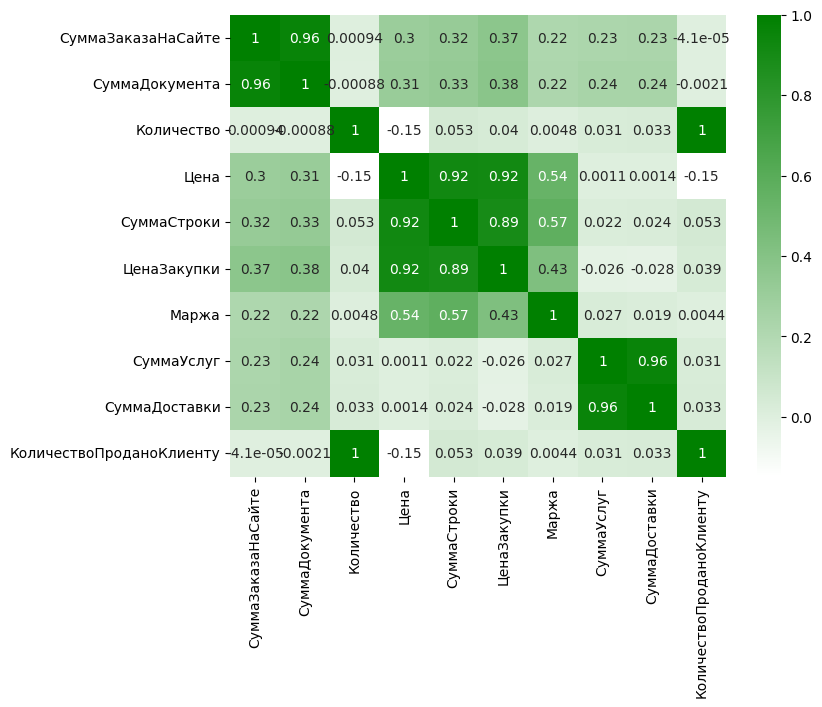

In [26]:
custom_palette = LinearSegmentedColormap.from_list("custom_greens", ["white", "green"])
selected_columns = [
    'СуммаЗаказаНаСайте', 'СуммаДокумента', 'Количество', 'Цена',
    'СуммаСтроки', 'ЦенаЗакупки', 'Маржа','СуммаУслуг', 'СуммаДоставки', 'КоличествоПроданоКлиенту'
]
fig = plt.figure(figsize = (8, 6))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap = custom_palette);

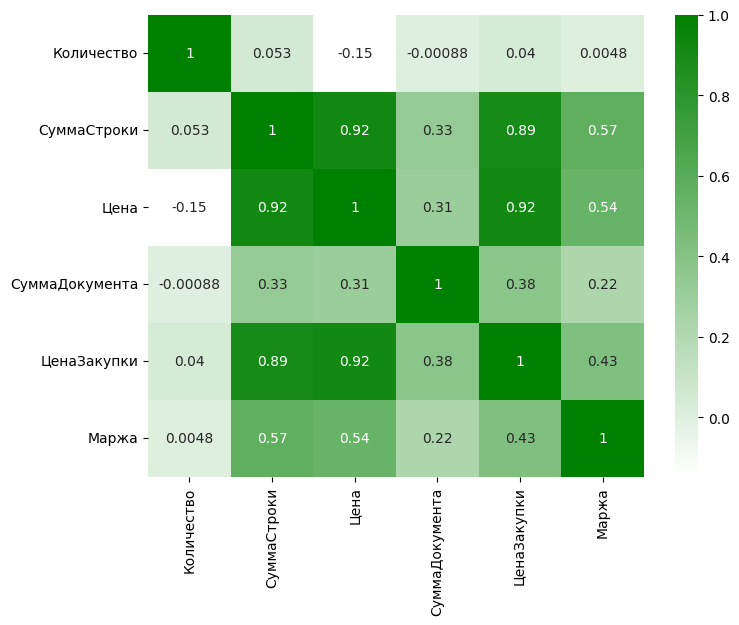

In [27]:
custom_palette = LinearSegmentedColormap.from_list("custom_greens", ["white", "green"])
selected_columns = [
    'Количество','СуммаСтроки', 'Цена',
    'СуммаДокумента', 'ЦенаЗакупки', 'Маржа'
]
fig = plt.figure(figsize = (8, 6))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap = custom_palette);

In [28]:
mass = df.agg(["nunique",
               (lambda x: x.nunique() / len(x) * 100),
               (lambda x: x.isin([0]).sum()), 
               (lambda x: x.isin([0]).sum() / len(x) * 100),
               (lambda x: x.isna().sum()), 
               (lambda x: x.isna().sum() / len(x) * 100),]).transpose()

mass.columns = ["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs",] 
mass 

,Unique,Percent unique,Zeros,Percent zeros,NaNs,Percent NaNs
Дата,21476.0,4.905828,0.0,0.000000,0.0,0.000000
ДатаДоставки,109.0,0.024899,0.0,0.000000,0.0,0.000000
НомерЗаказаНаСайте,125896.0,28.758809,0.0,0.000000,0.0,0.000000
НовыйСтатус,13.0,0.002970,0.0,0.000000,0.0,0.000000
СуммаЗаказаНаСайте,959.0,0.219067,0.0,0.000000,392069.0,89.561523
СуммаДокумента,971.0,0.221809,1.0,0.000228,390082.0,89.107626
МетодДоставки,6.0,0.001371,0.0,0.000000,0.0,0.000000
ФормаОплаты,2.0,0.000457,0.0,0.000000,0.0,0.000000
Регион,488.0,0.111475,0.0,0.000000,0.0,0.000000
Группа2,13.0,0.002970,0.0,0.000000,0.0,0.000000


## Creating new columns with checking data (sum)

In [29]:
df.dtypes

Дата                         object
ДатаДоставки                 object
НомерЗаказаНаСайте           object
НовыйСтатус                  object
СуммаЗаказаНаСайте          float64
СуммаДокумента              float64
МетодДоставки                object
ФормаОплаты                  object
Регион                       object
Группа2                      object
Группа3                      object
Группа4                      object
Тип                          object
Номенклатура                 object
ТипТовара                    object
Отменено                     object
ПричинаОтмены                object
Количество                    int64
Цена                        float64
СуммаСтроки                 float64
ЦенаЗакупки                 float64
МесяцДатыЗаказа               int64
ГодДатыЗаказа                object
ПВЗ_код                      object
Статус                       object
Гео                          object
Маржа                       float64
СуммаУслуг                  

In [30]:
# СуммаЗаказаНаСайте = СуммаДокумента
df['Нов_СуммаЗаказаНаСайте'] = df['СуммаДокумента']

# СуммаСтроки = Цена * Количество
df['Нов_СуммаСтроки'] = df['Цена'] * df['Количество']

# Маржа = Нов_СуммаСтроки - ЦенаЗакупки
df['Нов_Маржа'] = df['Нов_СуммаСтроки'] - df['ЦенаЗакупки']

## Saving the table of placed orders

In [ ]:
df.to_csv('for_tables_filtered_data_Размещенные.csv', index=False, sep=';', encoding='utf-8-sig')

## One-Hot-Encoding

In [31]:
df = pd.read_csv('for_tables_filtered_data_Размещенные.csv.zip', sep=';')

In [32]:
# Only redeemed items
df = df[(df['НовыйСтатус'] == 'Доставлен')]

# Phone not '0'
df = df[(df['Телефон_new'] != '0')]

# We will replace Nan with a non-existent value, so that later we can delete all rows not with this value
df['ПричинаОтмены'] = df['ПричинаОтмены'].fillna(999999); 
df = df[(df['ПричинаОтмены'] == 999999)] 


df = df.dropna(subset = ['Группа2'])
df = df.dropna(subset = ['Группа3'])
df = df.dropna(subset = ['МетодДоставки'])
df = df.dropna(subset = ['ФормаОплаты'])

In [33]:
df.shape

(242263, 45)

In [87]:
phones_buyed = pd.read_csv('pivot_table_Phone_new_buyed.csv', sep=';') # 60643 rows × 12 columns
phones_all = pd.read_csv('pivot_table_Phone_new_all.csv', sep=';') # 90674 rows × 12 columns

In [89]:
# Phone not '0'
phones_buyed = phones_buyed[(phones_buyed['Телефон_new'] != '0')]
phones_all = phones_all[(phones_all['Телефон_new'] != '0')]

In [90]:
phones_all


,Телефон_new,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента,Количество
0,55574954-50515053535277,2926,794,0.271360,264.666667,1023,3,11,4,1,794,12
1,55574851-50484949535070,1698,444,0.261484,444.000000,1878,1,2,2,1,444,2
2,55575456-53575451535378,21801,7190,0.329801,2396.666667,7417,3,29,10,1,7190,29
3,55574954-56545048505170,4038,1262,0.312531,631.000000,2636,2,18,9,1,1262,19
4,55574853-54564857495274,7303,1207,0.165275,241.400000,3724,5,18,4,1,1207,18
...,...,...,...,...,...,...,...,...,...,...,...,...
90669,55574949-57565751545277,1399,500,0.357398,500.000000,1498,1,1,1,1,500,1
90670,55574854-55505648555577,1616,1423,0.880569,1423.000000,1665,1,1,1,1,1423,8
90671,55575053-50544856505076,3220,1480,0.459627,1480.000000,3269,1,4,4,1,1480,4
90672,55575054-55574849485475,225,86,0.382222,86.000000,274,1,1,1,1,86,1


In [91]:
phones_buyed

,Телефон_new,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента,Количество
0,55574954-50515053535277,992,435,0.438508,217.5,545,2,3,2,1,435,3
1,55574954-56545048505170,4038,1262,0.312531,631.0,2636,2,18,9,1,1262,19
2,55575349-49505555535574,7910,2891,0.365487,2891.0,7910,1,2,2,1,2891,2
3,55574854-55525053544978,1101,459,0.416894,459.0,1150,1,2,2,1,459,2
4,55575351-51495656575170,2622,759,0.289474,759.0,2622,1,6,6,1,759,6
...,...,...,...,...,...,...,...,...,...,...,...,...
60639,55574949-57565751545277,1399,500,0.357398,500.0,1498,1,1,1,1,500,1
60640,55574854-55505648555577,1616,1423,0.880569,1423.0,1665,1,1,1,1,1423,8
60641,55575053-50544856505076,3220,1480,0.459627,1480.0,3269,1,4,4,1,1480,4
60642,55575054-55574849485475,225,86,0.382222,86.0,274,1,1,1,1,86,1


phones_buyed.merge(phones_all, ...)

Сначала phones_buyed (выкупленные), потом phones_all (все / оформленные)

Выручка_x, ... (выкупленные)

Выручка_y, ... (все / оформленные)

In [92]:
vitrina = (phones_buyed.merge(phones_all, on = ['Телефон_new'], how='inner')) # 60643 rows × 23 columns

In [96]:
print(vitrina.columns)
print(len(vitrina.columns))  


Index(['Телефон_new', 'Выручка_x', 'Абсолютная маржа_x', 'Маржа_x',
       'Средняя маржа_x', 'Средний чек_x', 'Кол-во чеков_x',
       'Кол-во товаров_x', 'Среднее кол-во товаров в  чеке_x',
       'Кол-во уникальных клиентов_x', 'Ценность клиента_x', 'Количество_x',
       'Выручка_y', 'Абсолютная маржа_y', 'Маржа_y', 'Средняя маржа_y',
       'Средний чек_y', 'Кол-во чеков_y', 'Кол-во товаров_y',
       'Среднее кол-во товаров в  чеке_y', 'Кол-во уникальных клиентов_y',
       'Ценность клиента_y', 'Количество_y'],
      dtype='object')
23


In [40]:
vitrina.columns = ['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed','Количество_all', 'Выручка_all',
       'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all', 'Средний чек_all',
       'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all', 'Количество_all']

In [41]:
# Витрина с основными показателями с выкупленными и размещенными товарами
vitrina.to_csv('vitrina_only_general_info.csv', index=False, sep=';') 

In [42]:
# sum the number of the items within a group 

def pr(x, tag): 
    return (np.array(x).reshape((-1)) == tag).sum()

## МетодДоставки НЕТ

In [43]:
df['МетодДоставки'].unique()

array(['Магазины'], dtype=object)

In [44]:
len(df['МетодДоставки'].unique())

1

In [45]:
# Группировка и агрегация без вложенных словарей
items_delivery = df.groupby('Телефон_new').agg(
    Магазины=('МетодДоставки', lambda x: pr(x, 'Магазины'))
)

# Если требуется дальнейшая агрегация, она уже выполняется после
items_delivery = items_delivery.groupby(level=0).agg('sum')


## Группа2

In [46]:
df['Группа2'].unique()

array(['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ОБУВЬ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'], dtype=object)

In [47]:
len(df['Группа2'].unique())

13

In [48]:
items_Group2 = df.groupby('Телефон_new').agg(
    КРУПНОГАБАРИТНЫЙ_ТОВАР=('Группа2', lambda x: pr(x, 'КРУПНОГАБАРИТНЫЙ ТОВАР')),
    ТЕКСТИЛЬ_ТРИКОТАЖ=('Группа2', lambda x: pr(x, 'ТЕКСТИЛЬ, ТРИКОТАЖ')),
    ОБУВЬ=('Группа2', lambda x: pr(x, 'ОБУВЬ')),
    КАНЦТОВАРЫ_КНИГИ_ДИСКИ=('Группа2', lambda x: pr(x, 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ')),
    ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ=('Группа2', lambda x: pr(x, 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ')),
    ИГРУШКИ=('Группа2', lambda x: pr(x, 'ИГРУШКИ')),
    КОСМЕТИКА_ГИГИЕНА=('Группа2', lambda x: pr(x, 'КОСМЕТИКА/ГИГИЕНА')),
    СОПУТСТВУЮЩИЕ_ТОВАРЫ=('Группа2', lambda x: pr(x, 'СОПУТСТВУЮЩИЕ ТОВАРЫ')),
    ЖЕНСКИЕ_ШТУЧКИ=('Группа2', lambda x: pr(x, 'ЖЕНСКИЕ ШТУЧКИ')),
    ПОДГУЗНИКИ=('Группа2', lambda x: pr(x, 'ПОДГУЗНИКИ')),
    ДЕТСКОЕ_ПИТАНИЕ=('Группа2', lambda x: pr(x, 'ДЕТСКОЕ ПИТАНИЕ')),
    ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА=('Группа2', lambda x: pr(x, 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА')),
    ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ=('Группа2', lambda x: pr(x, 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'))
)

# Если нужно продолжить суммирование по уровням:
items_Group2 = items_Group2.groupby(level=0).agg('sum')


In [49]:
items_Group2.shape

(60643, 13)

In [50]:
items_Group2.to_csv('items_Group2.csv', index=False, sep=';') 

## ФормаОплаты НЕТ

In [51]:
df['ФормаОплаты'].unique()

array(['Безналичная'], dtype=object)

In [52]:
len(df['ФормаОплаты'].unique())

1

In [53]:
# Группировка и агрегация без вложенных словарей
items_payment = df.groupby('Телефон_new').agg(
    Безналичная=('ФормаОплаты', lambda x: pr(x, 'Безналичная'))
)

# Суммирование по уровням, если требуется
items_payment = items_payment.groupby(level=0).agg('sum')


## Гео

ГородМагазина -- 64 unique values (we'll take top-5 + "другое")
МагазинЗаказа -- 89 unique values (number of store, not city)
Гео -- 'Москва', 'МО', 'Регионы' (a small number of unique values - 3)

## We add the 'ГородМагазина', but since there are a lot of them (64), we take them with the largest revenue as separate ones, and combine the rest as 'Другое'.

In [54]:
# Заменяем все значения '0' на 'ИнтернетДоставка' в столбце 'ГородМагазина'
df['ГородМагазина'] = df['ГородМагазина'].replace(0, 'ИнтернетДоставка')


In [55]:
df['ГородМагазина'].value_counts()

ИнтернетДоставка    239444
Москва                 255
Калуга                 242
Саратов                191
Ростов-на-Дону         181
                     ...  
Волжский                 7
Стерлитамак              6
Пенза                    6
Казань                   6
Коломна                  6
Name: ГородМагазина, Length: 64, dtype: int64

In [56]:
arr_CityShop = df['ГородМагазина'].unique()

for reg in arr_CityShop:
    if (reg != 'ИнтернетДоставка' and reg != 'Калуга' and reg != 'Москва' and 
        reg != 'Ростов-на-Дону' and reg != 'Саратов'): 
        
        df.loc[df['ГородМагазина'] == reg, 'ГородМагазина'] = 'Другой'

In [57]:
df['ГородМагазина'].unique()

array(['ИнтернетДоставка', 'Другой', 'Ростов-на-Дону', 'Москва',
       'Саратов', 'Калуга'], dtype=object)

In [58]:
items_CityShop = df.groupby('Телефон_new').agg(
    ИнтернетДоставка=('ГородМагазина', lambda x: pr(x, 'ИнтернетДоставка')),
    Калуга=('ГородМагазина', lambda x: pr(x, 'Калуга')),
    Москва=('ГородМагазина', lambda x: pr(x, 'Москва')),
    Ростов_на_Дону=('ГородМагазина', lambda x: pr(x, 'Ростов-на-Дону')),
    Саратов=('ГородМагазина', lambda x: pr(x, 'Саратов')),
    Другой=('ГородМагазина', lambda x: pr(x, 'Другой'))
)

# Суммирование, если требуется
items_CityShop = items_CityShop.groupby(level=0).agg('sum')


In [59]:
items_CityShop.shape

(60643, 6)

In [60]:
items_CityShop.to_csv('items_CityShop.csv', index=False, sep=';') 

## Final merge

In [61]:
items_Group2
#items_delivery
#items_payment
items_CityShop

,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
Телефон_new,,,,,,
55515349-57485148505273,0,0,0,0,0,1
55515349-57485748544876,0,0,0,0,0,1
55535057-57525455575274,3,0,0,0,0,0
55545651-57575053555375,1,0,0,0,0,0
55574848-48484957505771,8,0,0,0,0,0
...,...,...,...,...,...,...
56574953-57535556534880,2,0,0,0,0,0
56575655-52525750505484,7,0,0,0,0,0
57485453-52545749545698,1,0,0,0,0,0


In [97]:
items_Group2

,КРУПНОГАБАРИТНЫЙ_ТОВАР,ТЕКСТИЛЬ_ТРИКОТАЖ,ОБУВЬ,КАНЦТОВАРЫ_КНИГИ_ДИСКИ,ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ,ИГРУШКИ,КОСМЕТИКА_ГИГИЕНА,СОПУТСТВУЮЩИЕ_ТОВАРЫ,ЖЕНСКИЕ_ШТУЧКИ,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ
Телефон_new,,,,,,,,,,,,,
55515349-57485148505273,1,0,0,0,0,0,0,0,0,0,0,0,0
55515349-57485748544876,1,0,0,0,0,0,0,0,0,0,0,0,0
55535057-57525455575274,0,3,0,0,0,0,0,0,0,0,0,0,0
55545651-57575053555375,0,0,1,0,0,0,0,0,0,0,0,0,0
55574848-48484957505771,0,0,0,0,0,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56574953-57535556534880,0,0,0,0,0,0,2,0,0,0,0,0,0
56575655-52525750505484,0,1,0,0,0,0,2,0,0,2,2,0,0
57485453-52545749545698,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
vitrina_Group2  = (vitrina.merge(
    items_Group2, on = ['Телефон_new'], how='inner'))

#vitrina_Group2_delivery = (vitrina_Group2.merge(
#    items_delivery, on = ['Телефон_new'], how='inner'))
#
#vitrina_Group2_delivery_payment = (vitrina_Group2_delivery.merge(
#    items_payment, on = ['Телефон_new'], how='inner'))

vitrina_Group2_region = (vitrina_Group2.merge(
    items_CityShop, on = ['Телефон_new'], how='inner'))

In [63]:
vitrina_Group2_region.shape 

(60643, 42)

In [64]:
vitrina_Group2_region = vitrina_Group2_region[(vitrina_Group2_region['Телефон_new'] != '0')] 

In [65]:
vitrina_Group2_region.to_csv('vitrina_Group2_region.csv', index=False, sep=';')

## By percentage / shares

In [66]:
vitrina_Group2_region = pd.read_csv('vitrina_Group2_region.csv', sep=';') 

In [67]:
vitrina1 = vitrina_Group2_region.copy() 

In [68]:
df.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа', 'Нов_СуммаЗаказаНаСайте',
       'Нов_СуммаСтроки', 'Нов_Маржа', 'Дата_дата', 'ДеньНеделиЦифра',
       'ВремяОкругл', 'ДеньНедели'],
      dtype='object')

In [70]:
df['ГородМагазина'].unique()

array(['ИнтернетДоставка', 'Другой', 'Ростов-на-Дону', 'Москва',
       'Саратов', 'Калуга'], dtype=object)

In [71]:
# Выбор столбцов с помощью фильтрации
selected_columns = vitrina1.columns[
    vitrina1.columns.str.contains('КРУПНОГАБАРИТНЫЙ_ТОВАР|ТОВАРЫ ДЛЯ ЖИВОТНЫХ')
]
vitrina1['sum_Group2'] = vitrina1[selected_columns].sum(axis=1)
vitrina1['sum_Region'] = vitrina1.loc[:, 'ИнтернетДоставка':'Калуга'].sum(axis=1)

In [72]:
vitrina1['sum_Group2'] = vitrina1.loc[:, 'КРУПНОГАБАРИТНЫЙ_ТОВАР':'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ'].sum(axis=1)
#vitrina1['sum_DeliveryType'] = vitrina1.loc[:, 'Самовывоз':'Курьерская'].sum(axis=1)s
#vitrina1['sum_PaymentType'] = vitrina1.loc[:, 'КартойПриПолучении':'Банк Тинькофф'].sum(axis=1)
vitrina1['sum_Region'] = vitrina1.loc[:, 'ИнтернетДоставка':'Калуга'].sum(axis=1)

In [73]:
print(vitrina1.columns)


Index(['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Количество_all', 'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all',
       'Средняя маржа_all', 'Средний чек_all', 'Кол-во чеков_all',
       'Кол-во товаров_all', 'Среднее кол-во товаров в  чеке_all',
       'Кол-во уникальных клиентов_all', 'Ценность клиента_all',
       'Количество_all.1', 'КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ',
       'ОБУВЬ', 'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА',
       'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва',
       'Ростов_на_Дону', 'Саратов', 'Другой', 'sum_Group2', 'sum_Region

In [74]:
col_Group2 = ['КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ', 'ОБУВЬ',
       'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА',
       'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ']

#col_DeliveryType = ['Самовывоз', 'Курьерская']
#
#col_PaymentType = ['КартойПриПолучении', 'Наличные', 'PayPal', 'Квитанция Сбербанка',
#                   'RBK Money', 'Кредит в магазине','Банк Тинькофф']

col_Region = ['ИнтернетДоставка', 'Другой', 'Ростов_на_Дону', 'Москва', 'Саратов', 'Калуга']

In [75]:
for col in col_Group2: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_Group2']

#for col in col_DeliveryType: 
#    vitrina1[col] = vitrina1[col]/vitrina1['sum_DeliveryType']
#
#for col in col_PaymentType: 
#    vitrina1[col] = vitrina1[col]/vitrina1['sum_PaymentType']

for col in col_Region: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_Region']

In [76]:
print(vitrina1.columns.tolist())


['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed', 'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed', 'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed', 'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed', 'Количество_all', 'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all', 'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all', 'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all', 'Ценность клиента_all', 'Количество_all.1', 'КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ', 'ОБУВЬ', 'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ', 'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ', 'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА', 'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва', 'Ростов_на_Дону', 'Саратов', 'Другой', 'sum_Group2', 'sum_Region']


In [77]:
print("col_Group2:", col_Group2)
print("col_Region:", col_Region)


col_Group2: ['КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ', 'ОБУВЬ', 'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ', 'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ', 'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА', 'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ']
col_Region: ['ИнтернетДоставка', 'Другой', 'Ростов_на_Дону', 'Москва', 'Саратов', 'Калуга']


In [78]:
print('sum_Group2' in vitrina1.columns)
print('sum_Region' in vitrina1.columns)


True
True


In [79]:
del vitrina1['sum_Group2']
#del vitrina1['sum_DeliveryType']
#del vitrina1['sum_PaymentType']
del vitrina1['sum_Region']

In [80]:
vitrina1.to_csv('vitrina_final.csv', index=False, sep=';') 

In [81]:
vitrina1.columns

Index(['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Количество_all', 'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all',
       'Средняя маржа_all', 'Средний чек_all', 'Кол-во чеков_all',
       'Кол-во товаров_all', 'Среднее кол-во товаров в  чеке_all',
       'Кол-во уникальных клиентов_all', 'Ценность клиента_all',
       'Количество_all.1', 'КРУПНОГАБАРИТНЫЙ_ТОВАР', 'ТЕКСТИЛЬ_ТРИКОТАЖ',
       'ОБУВЬ', 'КАНЦТОВАРЫ_КНИГИ_ДИСКИ', 'ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА_ГИГИЕНА', 'СОПУТСТВУЮЩИЕ_ТОВАРЫ', 'ЖЕНСКИЕ_ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ_ПИТАНИЕ', 'ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА',
       'ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва',
       'Ростов_на_Дону', 'Саратов', 'Другой'],
      dtype='object')

In [82]:
vitrina1.head()

,Телефон_new,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,Количество_all,Выручка_all,Абсолютная маржа_all,Маржа_all,Средняя маржа_all,Средний чек_all,Кол-во чеков_all,Кол-во товаров_all,Среднее кол-во товаров в чеке_all,Кол-во уникальных клиентов_all,Ценность клиента_all,Количество_all.1,КРУПНОГАБАРИТНЫЙ_ТОВАР,ТЕКСТИЛЬ_ТРИКОТАЖ,ОБУВЬ,КАНЦТОВАРЫ_КНИГИ_ДИСКИ,ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ,ИГРУШКИ,КОСМЕТИКА_ГИГИЕНА,СОПУТСТВУЮЩИЕ_ТОВАРЫ,ЖЕНСКИЕ_ШТУЧКИ,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
0,55574954-50515053535277,992,435,0.438508,217.5,545,2,3,2,1,435,3,2926,794,0.271360,264.666667,1023,3,11,4,1,794,12,0.333333,0.000000,0.333333,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,55574954-56545048505170,4038,1262,0.312531,631.0,2636,2,18,9,1,1262,19,4038,1262,0.312531,631.000000,2636,2,18,9,1,1262,19,0.055556,0.000000,0.000000,0.0,0.111111,0.722222,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,55575349-49505555535574,7910,2891,0.365487,2891.0,7910,1,2,2,1,2891,2,7910,2891,0.365487,2891.000000,7910,1,2,2,1,2891,2,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,55574854-55525053544978,1101,459,0.416894,459.0,1150,1,2,2,1,459,2,1101,459,0.416894,459.000000,1150,1,2,2,1,459,2,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,55575351-51495656575170,2622,759,0.289474,759.0,2622,1,6,6,1,759,6,2622,759,0.289474,759.000000,2622,1,6,6,1,759,6,0.000000,0.666667,0.000000,0.0,0.000000,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
vitrina1

,Телефон_new,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,Количество_all,Выручка_all,Абсолютная маржа_all,Маржа_all,Средняя маржа_all,Средний чек_all,Кол-во чеков_all,Кол-во товаров_all,Среднее кол-во товаров в чеке_all,Кол-во уникальных клиентов_all,Ценность клиента_all,Количество_all.1,КРУПНОГАБАРИТНЫЙ_ТОВАР,ТЕКСТИЛЬ_ТРИКОТАЖ,ОБУВЬ,КАНЦТОВАРЫ_КНИГИ_ДИСКИ,ТОВАРЫ_ДЛЯ_КОРМЛЕНИЯ,ИГРУШКИ,КОСМЕТИКА_ГИГИЕНА,СОПУТСТВУЮЩИЕ_ТОВАРЫ,ЖЕНСКИЕ_ШТУЧКИ,ПОДГУЗНИКИ,ДЕТСКОЕ_ПИТАНИЕ,ТЕХНИКА_И_ТОВАРЫ_ДЛЯ_ДОМА,ТОВАРЫ_ДЛЯ_ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов_на_Дону,Саратов,Другой
0,55574954-50515053535277,992,435,0.438508,217.5,545,2,3,2,1,435,3,2926,794,0.271360,264.666667,1023,3,11,4,1,794,12,0.333333,0.000000,0.333333,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,55574954-56545048505170,4038,1262,0.312531,631.0,2636,2,18,9,1,1262,19,4038,1262,0.312531,631.000000,2636,2,18,9,1,1262,19,0.055556,0.000000,0.000000,0.0,0.111111,0.722222,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,55575349-49505555535574,7910,2891,0.365487,2891.0,7910,1,2,2,1,2891,2,7910,2891,0.365487,2891.000000,7910,1,2,2,1,2891,2,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,55574854-55525053544978,1101,459,0.416894,459.0,1150,1,2,2,1,459,2,1101,459,0.416894,459.000000,1150,1,2,2,1,459,2,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,55575351-51495656575170,2622,759,0.289474,759.0,2622,1,6,6,1,759,6,2622,759,0.289474,759.000000,2622,1,6,6,1,759,6,0.000000,0.666667,0.000000,0.0,0.000000,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60638,55574949-57565751545277,1399,500,0.357398,500.0,1498,1,1,1,1,500,1,1399,500,0.357398,500.000000,1498,1,1,1,1,500,1,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60639,55574854-55505648555577,1616,1423,0.880569,1423.0,1665,1,1,1,1,1423,8,1616,1423,0.880569,1423.000000,1665,1,1,1,1,1423,8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60640,55575053-50544856505076,3220,1480,0.459627,1480.0,3269,1,4,4,1,1480,4,3220,1480,0.459627,1480.000000,3269,1,4,4,1,1480,4,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60641,55575054-55574849485475,225,86,0.382222,86.0,274,1,1,1,1,86,1,225,86,0.382222,86.000000,274,1,1,1,1,86,1,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1]:
vitrina1.head()

NameError: name 'vitrina1' is not defined